# SUPPORT VECTOR MACHINE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('mushroom.csv')

## Task 1: Exploratory Data Analysis (EDA)

In [5]:
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [7]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698606
max,1279.000000,15.095066,25.000054


In [8]:
data = data.drop(columns=['Unnamed: 0'], errors='ignore')

## box plots

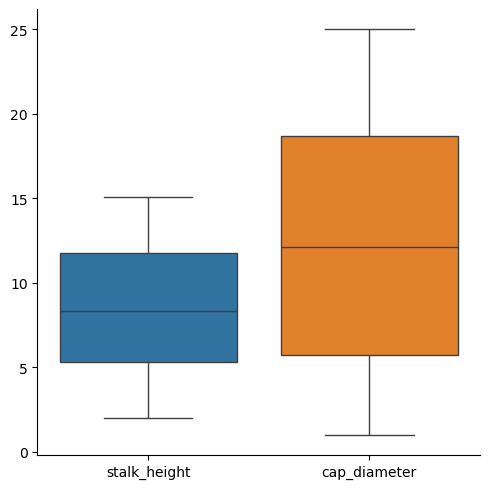

In [10]:
sns.catplot(data, kind = 'box')
plt.show()

## Task 2: Data Preprocessing

## One-Hot Encoding

In [13]:
data.head(2)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319


In [14]:
cat_col = data.select_dtypes(include=['object']).drop(columns=['class'])

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
onehot_encode = pd.get_dummies(cat_col, dtype = int)

In [17]:
onehot_encode

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1996,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1997,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1998,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
data.drop(columns = cat_col.columns, inplace = True)

In [19]:
datas = onehot_encode.join(data)

In [20]:
datas

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class,stalk_height,cap_diameter
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,poisonous,14.276173,5.054983
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,edible,3.952715,19.068319
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,poisonous,9.054265,7.205884
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,poisonous,5.226499,20.932692
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,poisonous,5.877891,17.464145
1996,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,poisonous,6.500840,13.501957
1997,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,poisonous,13.558064,11.270020
1998,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,poisonous,11.092703,8.423199


In [21]:
datas.columns

Index(['cap_shape_bell', 'cap_shape_conical', 'cap_shape_convex',
       'cap_shape_flat', 'cap_shape_sunken', 'cap_surface_fibrous',
       'cap_surface_grooves', 'cap_surface_scaly', 'cap_surface_smooth',
       'cap_color_brown',
       ...
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object', length=127)

## Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
datas.columns

Index(['cap_shape_bell', 'cap_shape_conical', 'cap_shape_convex',
       'cap_shape_flat', 'cap_shape_sunken', 'cap_surface_fibrous',
       'cap_surface_grooves', 'cap_surface_scaly', 'cap_surface_smooth',
       'cap_color_brown',
       ...
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object', length=127)

In [26]:
label = le.fit_transform(datas['class'])

In [27]:
label

array([1, 0, 1, ..., 1, 1, 1])

In [28]:
label = pd.DataFrame(label, columns = ['class'])

In [29]:
datas = datas.drop(columns=['class'])

In [30]:
new_data = datas.join(label)

In [31]:
new_data

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,stalk_height,cap_diameter,class
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,14.276173,5.054983,1
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,3.952715,19.068319,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,9.054265,7.205884,1
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,5.226499,20.932692,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,14.037532,12.545245,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,5.877891,17.464145,1
1996,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,6.500840,13.501957,1
1997,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,13.558064,11.270020,1
1998,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,11.092703,8.423199,1


## Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaled_data = scaler.fit_transform(new_data[['stalk_height', 'cap_diameter']])

In [36]:
scaled_data = pd.DataFrame(scaled_data, columns = [['stalk_height', 'cap_diameter']])

In [37]:
scaled_data = scaled_data.drop(columns=['stalk_height', 'cap_diameter'])

In [38]:
mushroom = scaled_data.join(new_data)

In [39]:
mushroom

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,stalk_height,cap_diameter,class
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,14.276173,5.054983,1
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,3.952715,19.068319,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,9.054265,7.205884,1
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,5.226499,20.932692,1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,14.037532,12.545245,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,5.877891,17.464145,1
1996,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,6.500840,13.501957,1
1997,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,13.558064,11.270020,1
1998,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,11.092703,8.423199,1


### Split the dataset into training and testing sets.

In [41]:
X = mushroom.iloc[:, 0:126]

In [42]:
X.head()

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_brown,...,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,stalk_height,cap_diameter
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,14.276173,5.054983
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,3.952715,19.068319
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,9.054265,7.205884
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,5.226499,20.932692
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,14.037532,12.545245


In [43]:
y = mushroom.iloc[:, 126]

In [44]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: class, dtype: int32

## Task 3: Data Visualization

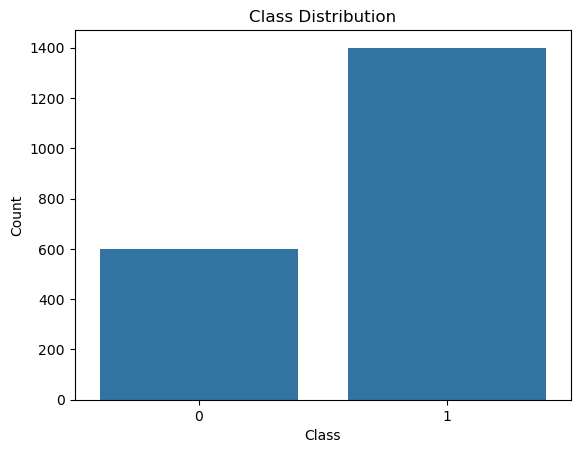

In [46]:
sns.countplot(x = mushroom['class'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

## Task 4: SVM Implementation

### SVM classifier

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
X_train, X_test, y_train, y_test = train = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 126), (400, 126), (1600,), (400,))

## Train the SVM model on the training data

In [52]:
svc_model = SVC(C = 15, gamma = 0.1, kernel='linear')
svc_model.fit(X_train, y_train)

SVC(C=15, gamma=0.1, kernel='linear')

## Evaluate model performance on the testing data using appropriate metrics

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       467
           1       0.71      1.00      0.83      1133

    accuracy                           0.71      1600
   macro avg       0.35      0.50      0.41      1600
weighted avg       0.50      0.71      0.59      1600



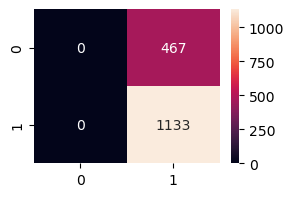

In [54]:
plt.figure(figsize=(3,2))
yhat_train = svc_model.predict(X_train)
cm = confusion_matrix(y_train,yhat_train)
print(classification_report(y_train,yhat_train))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



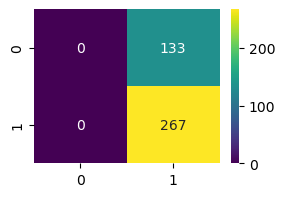

In [55]:
plt.figure(figsize=(3,2))
yhat_test = svc_model.predict(X_test)
cm = confusion_matrix(y_test,yhat_test)
print(classification_report(y_test,yhat_test))

sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.show()

## Task 5: Visualization of SVM Results

### Visualization of Classification Results on the Entire Dataset

In [58]:
from sklearn.manifold import TSNE

In [59]:
tmodel = TSNE(n_components=2)
tdata = tmodel.fit_transform(X)
tdata

array([[-55.396015,  65.0651  ],
       [ 53.391697, -38.7485  ],
       [-39.244865,  14.364353],
       ...,
       [ -7.707873,  61.921093],
       [-25.232073,  35.73821 ],
       [ 78.334656,  48.487427]], dtype=float32)

In [60]:
tdf = pd.DataFrame(data=tdata, columns=['c1','c2'])
tdf['class'] = mushroom['class']
tdf

,c1,c2,class
0,-55.396015,65.065102,1
1,53.391697,-38.748501,0
2,-39.244865,14.364353,1
3,70.151901,-33.547718,1
4,1.474610,61.519135,1
...,...,...,...
1995,34.641163,-23.925510,1
1996,9.222391,-26.266209,1
1997,-7.707873,61.921093,1
1998,-25.232073,35.738209,1


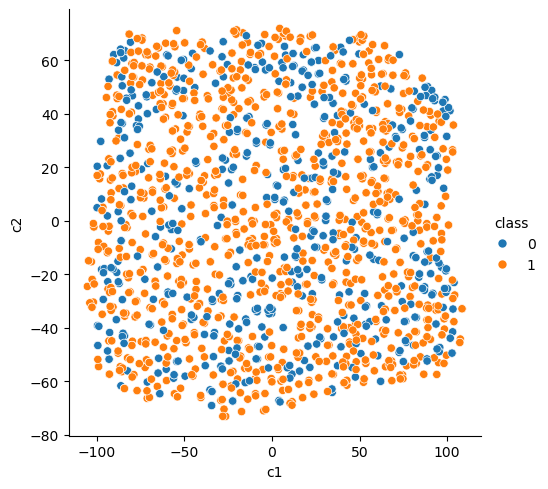

In [61]:
sns.relplot(data=tdf, x='c1',y='c2',kind='scatter',hue='class')
plt.show()

### Visualize classification results on the testing data.

In [63]:
tmodel = TSNE(n_components=2)
tdata = tmodel.fit_transform(X_test)
tdata

array([[ -26.942543  ,  -40.415237  ],
       [ -79.68578   ,   42.85259   ],
       [ -38.14094   ,   55.93774   ],
       [ -48.60457   ,  -20.563969  ],
       [   6.4665856 ,   18.850883  ],
       [   4.59075   ,  -53.513832  ],
       [  61.93151   ,  -27.135921  ],
       [ -42.571342  ,  -54.4888    ],
       [ 111.30569   ,  -26.843287  ],
       [  34.561176  ,  -54.93224   ],
       [ -98.47414   ,  -28.221724  ],
       [ -81.45862   ,  -58.31357   ],
       [   8.164567  ,   56.67634   ],
       [  84.13937   ,  -29.103474  ],
       [ -66.00717   ,  -56.943264  ],
       [ -77.974686  ,  -36.02476   ],
       [  48.26848   ,  -42.861267  ],
       [  89.498436  ,  -13.315963  ],
       [  34.709797  ,   29.428982  ],
       [   7.169701  ,   -5.328408  ],
       [  88.5285    ,   26.289433  ],
       [ -73.55055   ,   -6.85793   ],
       [ -63.433716  ,  -21.906982  ],
       [  -4.7731905 ,  -42.686386  ],
       [  41.39448   ,   -1.7102823 ],
       [  17.241758  ,   

In [64]:
tdf = pd.DataFrame(data=tdata, columns=['c1','c2'])
tdf['class'] = mushroom['class']
tdf

,c1,c2,class
0,-26.942543,-40.415237,1
1,-79.685783,42.852589,0
2,-38.140942,55.937740,1
3,-48.604568,-20.563969,1
4,6.466586,18.850883,1
...,...,...,...
395,-106.241989,-0.597906,1
396,5.167160,-43.412502,1
397,-72.710625,-43.313992,1
398,86.357849,-34.340096,0


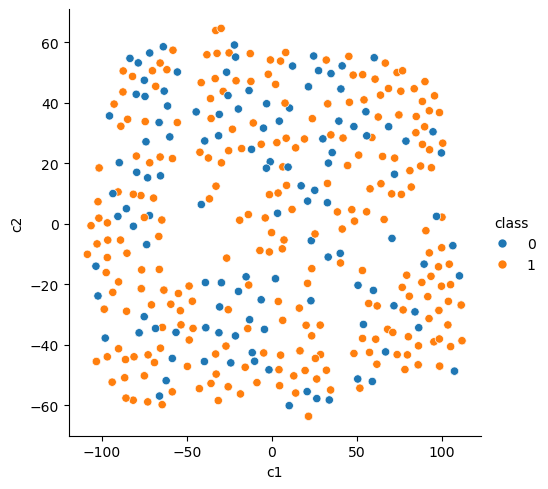

In [65]:
sns.relplot(data=tdf, x='c1',y='c2',kind='scatter',hue='class')
plt.show()

## Task 6: Parameter Tuning and Optimization

In [67]:
model = SVC()

In [77]:
parameters ={
            'C': [0.01,0.05,0.5,0.6,1.0,1.1,1.5],
        'gamma':[0.1,0.01,1],
        'kernel':['poly', 'rbf', 'linear']
}

In [79]:
cv = GridSearchCV(svc_model, param_grid=parameters, cv=5, scoring='accuracy')
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=15, gamma=0.1, kernel='linear'),
             param_grid={'C': [0.01, 0.05, 0.5, 0.6, 1.0, 1.1, 1.5],
                         'gamma': [0.1, 0.01, 1],
                         'kernel': ['poly', 'rbf', 'linear']},
             scoring='accuracy')

In [80]:
cv.best_params_

{'C': 0.6, 'gamma': 1, 'kernel': 'rbf'}

In [81]:
svc_model = SVC(C = 0.6, gamma = 1)
svc_model.fit(X_train, y_train)

SVC(C=0.6, gamma=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       467
           1       1.00      1.00      1.00      1133

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



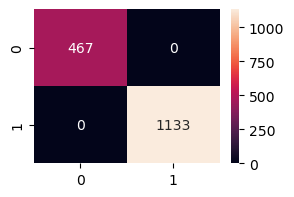

In [82]:
plt.figure(figsize=(3,2))
yhat_train = svc_model.predict(X_train)
cm = confusion_matrix(y_train,yhat_train)
print(classification_report(y_train,yhat_train))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



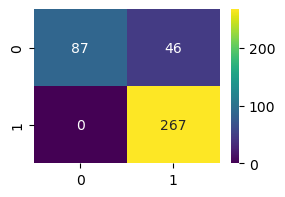

In [83]:
plt.figure(figsize=(3,2))
yhat_test = svc_model.predict(X_test)
cm = confusion_matrix(y_test,yhat_test)
print(classification_report(y_test,yhat_test))

sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.show()

## Task 7: Comparison and Analysis

### 1.	Compare SVM performance with various kernels

### Linear Kernel:
#### Training Accuracy: 71%
#### Testing Accuracy: 67%
#### Class 0 Misclassified Completely (Precision, Recall = 0)
#### Underfitting Issue – Model is too simple for the dataset.
                                        
### RBF Kernel:
#### Training Accuracy: 100% (Possible Overfitting)
#### Testing Accuracy: 89%
#### Better Performance on Class 0 (Recall = 0.65)
#### Handles Non-Linearity Well – More suitable for this dataset.

### 2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA 

### Strengths:
#### Distinctive features like odor, gill color, and spore print color strongly influence classification.
#### No missing values, ensuring clean data for modeling.
#### Numerical features (stalk height, cap diameter) provide additional classification insights.
                                      
### Weaknesses:
#### Too many categorical features (23 out of 26), requiring proper encoding.
#### Possible redundant features (e.g., stalk color above and below the ring).
#### Imbalanced feature categories (some odors appear mostly in one class).

### 3.	Discuss practical implications of SVM in real-world classification tasks.

### SVM Works Well:
#### Medical Diagnosis – Detecting diseases like cancer using patient data.
#### Fraud Detection – Identifying fraudulent transactions in banking.
#### Text Classification – Spam detection, sentiment analysis.
#### Image Recognition – Handwriting recognition, face detection.

### Challenges of SVM:
#### Computationally Expensive for large datasets.
#### Sensitive to Noise – Outliers can affect performance.
#### Feature Scaling Needed – Requires normalization for optimal results.

#### SVM is powerful for small to medium-sized datasets with clear class boundaries, but alternatives like deep learning work better for big data. 